In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 14,8


In [11]:
df = pd.read_excel("./../dados/Base WDI - Séries listadas no programa - 1991 a 2019  v01dez2020.xlsx",sheet_name = "Data" )

In [12]:
df.head(2)

,Country Name,Country Code,Series Name,Series Code,1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,..,..,..,..,..,..,...,23.7437,24.3909,22.8107,22.137,20.6343,21.0811,20.4665,20.2528,21.1344,..
1,Afghanistan,AFG,Chemicals (% of value added in manufacturing),NV.MNF.CHEM.ZS.UN,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [13]:
df_alemanha = df.loc[df["Country Name"] == "Germany"]
df_alemanha = df_alemanha.drop(["Country Name","Country Code","Series Code"], axis=1)
df_alemanha = df_alemanha.set_index("Series Name", drop=True)

In [14]:
df_alemanha = df_alemanha.T

In [15]:
print("\nColunas no dataset\n")
[print(coluna) for coluna in df_alemanha.columns]
print("\n")


Colunas no dataset

Agriculture, forestry, and fishing, value added (% of GDP)
Chemicals (% of value added in manufacturing)
Central government debt, total (% of GDP)
Deposit interest rate (%)
Expense (% of GDP)
Food, beverages and tobacco (% of value added in manufacturing)
GDP growth (annual %)
GNI, PPP (current international $)
GNI per capita, PPP (current international $)
GDP per capita growth (annual %)
GDP per person employed (constant 2017 PPP $)
Industry (including construction), value added (% of GDP)
Inflation, consumer prices (annual %)
Lending interest rate (%)
Manufacturing, value added (% of GDP)
Machinery and transport equipment (% of value added in manufacturing)
Net lending (+) / net borrowing (-) (% of GDP)
Other manufacturing (% of value added in manufacturing)
Population, female
Population, female (% of total population)
Population, male
Population, male (% of total population)
Population, total
Revenue, excluding grants (% of GDP)
Risk premium on lending (lending 

In [64]:
df_interesse = df_alemanha[["GDP growth (annual %)",
                            "GNI, PPP (current international $)",
                            "GNI per capita, PPP (current international $)"]].iloc[-12:-1:]

df_interesse.head(2)

Series Name,GDP growth (annual %),"GNI, PPP (current international $)","GNI per capita, PPP (current international $)"
2009 [YR2009],-5.69715,3.08626e+12,37680
2010 [YR2010],4.17897,3.2515e+12,39760


In [65]:
anos = [int(ano[:4]) for ano in list(df_interesse.index)]

df_interesse.index=anos

df_interesse = pd.DataFrame(df_interesse, dtype=float)


In [66]:
df_interesse.head(2)

Series Name,GDP growth (annual %),"GNI, PPP (current international $)","GNI per capita, PPP (current international $)"
2009,-5.697152,3.086257e+12,37680.0
2010,4.178969,3.251502e+12,39760.0


# Crescimento percentual real do PIB por ano

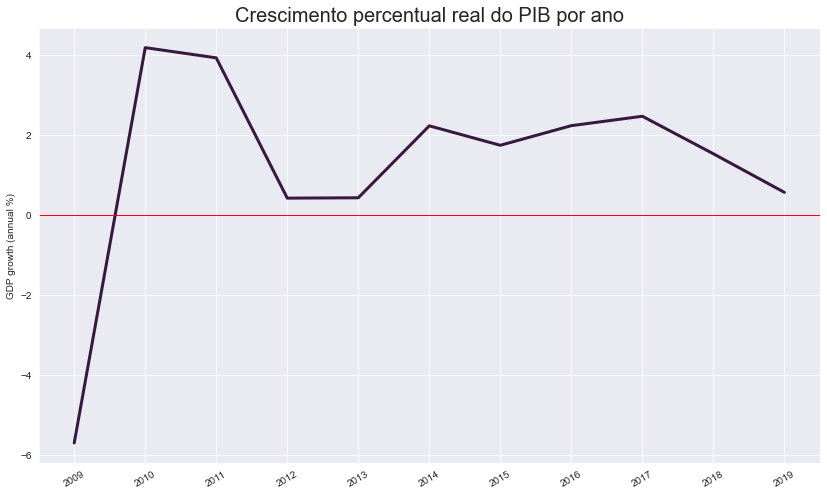

In [73]:
sns.set_style("darkgrid")
sns.set_palette("rocket")

plt.xticks(anos,rotation=30)

graph = sns.lineplot(data=df_interesse,x=df_interesse.index,y="GDP growth (annual %)", linewidth=3)

graph.axhline(0, color = "r",linewidth=1)

graph.set_title('Crescimento percentual real do PIB por ano', fontsize=20)

plt.savefig('./../graficos/cresc_pib_real.png')

plt.show()

# Analise RNB

In [68]:
"""
RNB           -- GNI, PPP (current international $)
RNB per capta -- GNI per capita, PPP (current international $) 
"""

'\nRNB           -- GNI, PPP (current international $)\nRNB per capta -- GNI per capita, PPP (current international $) \n'

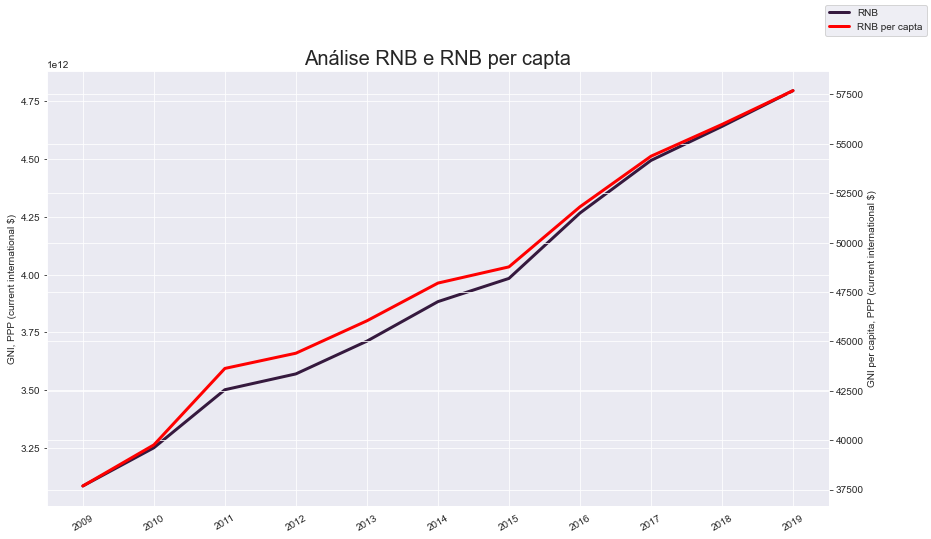

In [98]:
sns.set_style("darkgrid")
sns.set_palette("rocket")

plt.xticks(anos,rotation=30)

graph = sns.lineplot(data=df_interesse["GNI, PPP (current international $)"],
                     linewidth=3,
                     label="RNB",
                     legend=False)

ax2 = graph.twinx()

sns.lineplot(data=df_interesse["GNI per capita, PPP (current international $)"],
             linewidth=3,
             label="RNB per capta", 
             color = "red",
             legend=False)



graph.figure.legend()

graph.set_title('Análise RNB e RNB per capta', fontsize=20)

plt.savefig('./../graficos/analise_rnb.png')

plt.show()